# Business Problem
### To understand the major factors from the given dataset that influence the price of a house

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the data
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
#creating a new df with selected variables. 'price' is what we're looking to predict.
categories = ['bedrooms', 'bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','zipcode','price',
              'yr_renovated','sqft_above','sqft_basement']
data = df[categories]
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode,price,yr_renovated,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,0,0,3,98178,221900.0,0,1180.0,0
1,3,2.25,2570,7242,2.0,0,0,3,98125,538000.0,1991,2170.0,400
2,2,1.00,770,10000,1.0,0,0,3,98028,180000.0,0,770.0,0
3,4,3.00,1960,5000,1.0,0,0,5,98136,604000.0,0,1050.0,910
4,3,2.00,1680,8080,1.0,0,0,3,98074,510000.0,0,1680.0,0


##### Identifying categorical variables

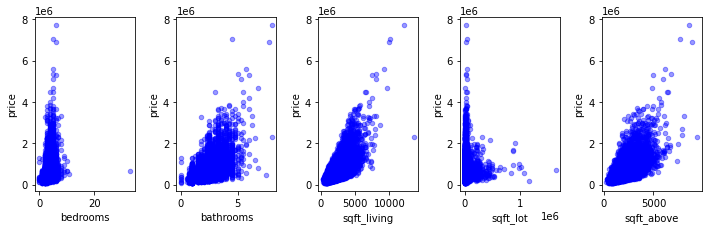

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10,3))
plt.tight_layout()
for xcol, ax in zip(['bedrooms', 'bathrooms','sqft_living','sqft_lot','sqft_above'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

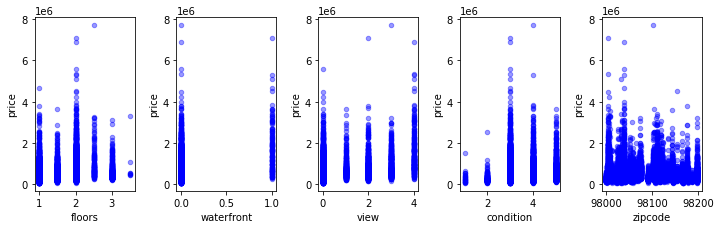

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10,3))
plt.tight_layout()
for xcol, ax in zip(['floors','waterfront','view','condition','zipcode'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

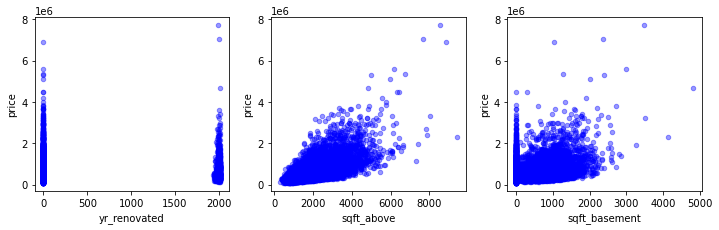

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,3))
plt.tight_layout()
for xcol, ax in zip(['yr_renovated','sqft_above','sqft_basement'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

#### From the plots, it is clear that floors, waterfront,view, zipcode and condition are categorical variables

#### Let's start with only the waterfront, view and condition variables

In [8]:
data['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [9]:
data['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [10]:
data['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

#### Since waterfront has only 2 categories, we can use OrdinalEncoder to generate binary values

In [11]:
from sklearn.preprocessing import OrdinalEncoder

waterfront = data[['waterfront']]
encoder_waterfront = OrdinalEncoder()
encoder_waterfront.fit(waterfront)
waterfront_encoded = encoder_waterfront.transform(waterfront)
waterfront_encoded

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [12]:
# Replacing the original waterfront values with the encoded values
data['waterfront'] = waterfront_encoded

In [13]:
# renaming the waterfront column
data.rename(columns = {'waterfront':'waterfront_encoded'},inplace = True)

#### Since floors, view and condition have multiple categories, we can use OneHotEncoder.Each category will be transformed into a new column and assigned binary values. We will then convert them to a df and add them to the original df to make it easier to read and create our model

In [14]:
# transforming 'view'

from sklearn.preprocessing import OneHotEncoder

view = data[['view']]
view_encoder = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')
view_encoder.fit(view)
view_encoded = view_encoder.transform(view)
view_encoded

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [15]:
#converting to a df
view_encoded_df = pd.DataFrame(view_encoded, index = data.index)
view_encoded_df

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
21608,1.0,0.0,0.0,0.0,0.0
21609,1.0,0.0,0.0,0.0,0.0
21610,1.0,0.0,0.0,0.0,0.0
21611,1.0,0.0,0.0,0.0,0.0


In [16]:
# creating new names for the columns
old_names = view_encoded_df.columns
new_names = ['view_0', 'view_1', 'view_2', 'view_3', 'view_4']
names = dict(zip(old_names, new_names))

In [17]:
# renaming the columns so better readability
view_encoded_df.rename(columns=names,inplace=True)
view_encoded_df

,view_0,view_1,view_2,view_3,view_4
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
21608,1.0,0.0,0.0,0.0,0.0
21609,1.0,0.0,0.0,0.0,0.0
21610,1.0,0.0,0.0,0.0,0.0
21611,1.0,0.0,0.0,0.0,0.0


In [18]:
# appending the view_encoded_df to the datadf
data.drop('view',axis=1,inplace=True)
data = pd.concat([data,view_encoded_df],axis=1)
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_encoded,condition,zipcode,price,yr_renovated,sqft_above,sqft_basement,view_0,view_1,view_2,view_3,view_4
0,3,1.00,1180,5650,1.0,0.0,3,98178,221900.0,0,1180.0,0,1.0,0.0,0.0,0.0,0.0
1,3,2.25,2570,7242,2.0,0.0,3,98125,538000.0,1991,2170.0,400,1.0,0.0,0.0,0.0,0.0
2,2,1.00,770,10000,1.0,0.0,3,98028,180000.0,0,770.0,0,1.0,0.0,0.0,0.0,0.0
3,4,3.00,1960,5000,1.0,0.0,5,98136,604000.0,0,1050.0,910,1.0,0.0,0.0,0.0,0.0
4,3,2.00,1680,8080,1.0,0.0,3,98074,510000.0,0,1680.0,0,1.0,0.0,0.0,0.0,0.0


In [19]:
# transforming 'condition'using OneHotEncoder
condition = data[['condition']]
condition_encoder = OneHotEncoder(categories='auto',sparse=False,handle_unknown='ignore')
condition_encoder.fit(condition)
condition_encoded = condition_encoder.transform(condition)
condition_encoded

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [20]:
#converting the encoded values into a df
condition_encoded_df = pd.DataFrame(condition_encoded,index=data.index)
condition_encoded_df.head()

,0,1,2,3,4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0


In [21]:
#renaming the columns
old_names= condition_encoded_df.columns
new_names = ['condition_0','condition_1','condition_2','condition_3','condition_4']
names = dict(zip(old_names,new_names))

condition_encoded_df.rename(columns=names,inplace=True)
condition_encoded_df

,condition_0,condition_1,condition_2,condition_3,condition_4
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
21608,0.0,0.0,1.0,0.0,0.0
21609,0.0,0.0,1.0,0.0,0.0
21610,0.0,0.0,1.0,0.0,0.0
21611,0.0,0.0,1.0,0.0,0.0


In [22]:
#adding to the original data df
data.drop('condition',axis=1,inplace=True)
data = pd.concat([data,condition_encoded_df],axis=1)
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront_encoded,zipcode,price,yr_renovated,sqft_above,...,view_0,view_1,view_2,view_3,view_4,condition_0,condition_1,condition_2,condition_3,condition_4
0,3,1.00,1180,5650,1.0,0.0,98178,221900.0,0,1180.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,2.25,2570,7242,2.0,0.0,98125,538000.0,1991,2170.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,1.00,770,10000,1.0,0.0,98028,180000.0,0,770.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,3.00,1960,5000,1.0,0.0,98136,604000.0,0,1050.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,2.00,1680,8080,1.0,0.0,98074,510000.0,0,1680.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedrooms            21613 non-null  int64  
 1   bathrooms           21613 non-null  float64
 2   sqft_living         21613 non-null  int64  
 3   sqft_lot            21613 non-null  int64  
 4   floors              21613 non-null  float64
 5   waterfront_encoded  21613 non-null  float64
 6   zipcode             21613 non-null  int64  
 7   price               21613 non-null  float64
 8   yr_renovated        21613 non-null  int64  
 9   sqft_above          21611 non-null  float64
 10  sqft_basement       21613 non-null  int64  
 11  view_0              21613 non-null  float64
 12  view_1              21613 non-null  float64
 13  view_2              21613 non-null  float64
 14  view_3              21613 non-null  float64
 15  view_4              21613 non-null  float64
 16  cond

In [24]:
# sqft_above has missing values
data['sqft_above'].isna().value_counts()

False    21611
True         2
Name: sqft_above, dtype: int64

In [25]:
data['sqft_above'].describe()

count    21611.000000
mean      1788.396095
std        828.128162
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

In [26]:
#imputing the median value
median = data['sqft_above'].median()
data['sqft_above'].fillna(median,inplace=True)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bedrooms            21613 non-null  int64  
 1   bathrooms           21613 non-null  float64
 2   sqft_living         21613 non-null  int64  
 3   sqft_lot            21613 non-null  int64  
 4   floors              21613 non-null  float64
 5   waterfront_encoded  21613 non-null  float64
 6   zipcode             21613 non-null  int64  
 7   price               21613 non-null  float64
 8   yr_renovated        21613 non-null  int64  
 9   sqft_above          21613 non-null  float64
 10  sqft_basement       21613 non-null  int64  
 11  view_0              21613 non-null  float64
 12  view_1              21613 non-null  float64
 13  view_2              21613 non-null  float64
 14  view_3              21613 non-null  float64
 15  view_4              21613 non-null  float64
 16  cond

In [28]:
#creating X and y for modelling
y=df['price']
X=data

In [29]:
# creating train and test splits
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=50)

In [30]:
# checking the shape of the datasets
print(f'shape of X_train is {X_train.shape}')
print(f'shape of y_train is {y_train.shape}')
print(f'shape of X_test is {X_test.shape}')
print(f'shape of y_test is {y_test.shape}')

shape of X_train is (16209, 21)
shape of y_train is (16209,)
shape of X_test is (5404, 21)
shape of y_test is (5404,)


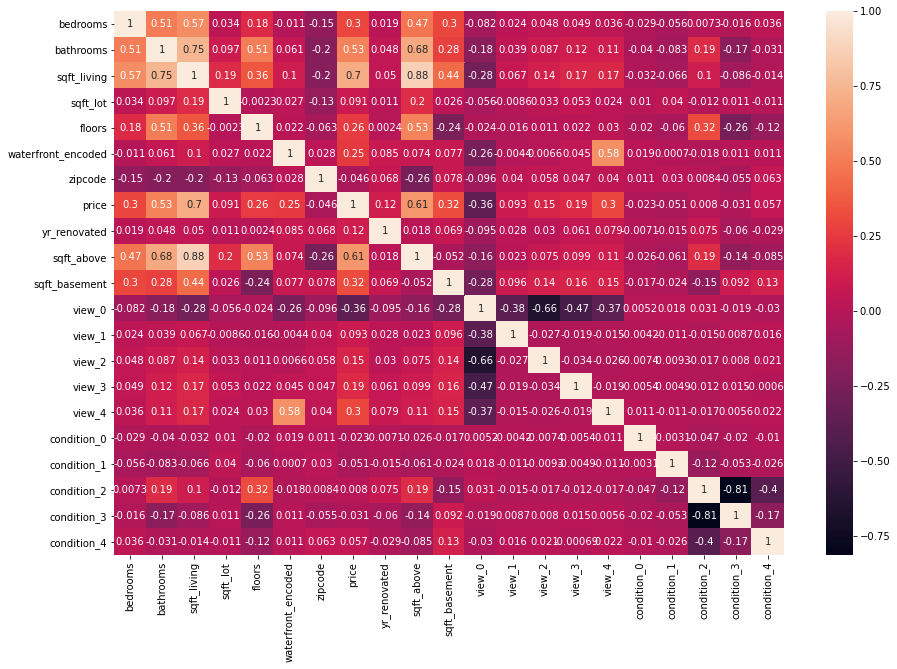

In [31]:
# visualizing co-realtion values
fig,ax = plt.subplots(figsize=(15,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True,ax=ax);

### From the heatmap, it is apparent that having encoded values makes no sense since the values are mostly 0 and even negative.This will have an adverse impact on the model and so it's best to revert to the orginal dataset for the modelling.

In [32]:
X = df
X.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [33]:
# dropping irrelevant columns
X.drop(['id','date','sqft_living15','sqft_lot15'],axis=1,inplace=True)
X.drop(['lat','long'],axis=1,inplace=True)

In [34]:
#imputing the median value
X['sqft_above'].fillna(median,inplace=True)

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  float64
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
dtypes: float64(4), int64(11)
memory usage: 2.5 MB


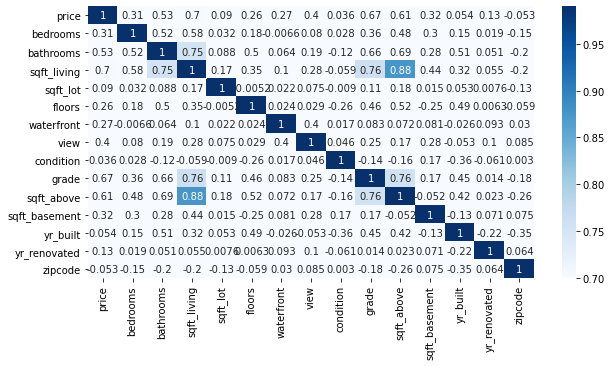

In [36]:
# visualizing the co-relation values of X
fig,ax = plt.subplots(figsize=(10,5))
corr = X.corr()
# filtering the correlation values using vmin and vmax 
sns.heatmap(corr,annot=True,vmin=0.70,vmax=0.99,cmap='Blues');

### We can see that for price, sqft_living has the highest correlation. We will use this to build our base line model

In [37]:
# removing price from X since it is the dependent variable
X.drop('price',axis=1,inplace=True)

In [38]:
#splitting the data into train and test splits
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=50)

print(f'shape of X_train is {X_train.shape}')
print(f'shape of y_train is {y_train.shape}')
print(f'shape of X_test is {X_test.shape}')
print(f'shape of y_test is {y_test.shape}')

shape of X_train is (16209, 14)
shape of y_train is (16209,)
shape of X_test is (5404, 14)
shape of y_test is (5404,)


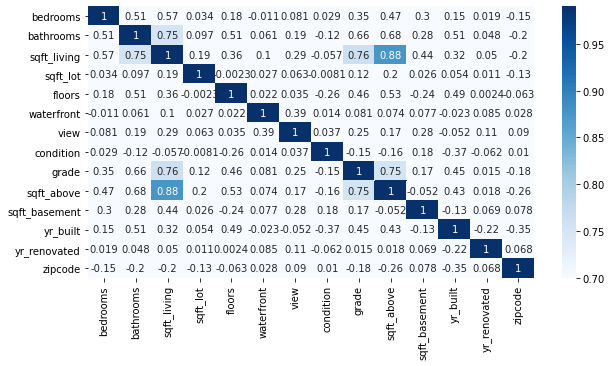

In [39]:
# visualizing the co-relation values on the train dataset
fig,ax = plt.subplots(figsize=(10,5))
corr = X_train.corr()
# filtering the correlation values using vmin and vmax 
sns.heatmap(corr,annot=True,vmin=0.70,vmax=0.99,cmap='Blues');

#### From the heatmap, we can see that the following pairs of variables are coorelation values > 0.75: (sqft_living,bathrooms),(sqft_living,sqft_above), (sqft_living,grade),(grade,sqft_above)


#### From the King's county website, grade is defined as the,quality of construction i.e materials, design, finish, workmanship etc. Naturally, a higher grade would mean a higher quality of house and would be more desirable for prospective buyers. Sqft_living refers to the carpet area of the house and bathrooms refers to the number of bathrooms in the house

# Modelling using Sci-Kit Learn

### Building the baseline model using sqft_living

In [50]:
# using cross validate and shuffle split.Shuffle split splits the data set further by the number of splits specified
# and runs the regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=42)

baseline_model = LinearRegression()

first_train_scores = cross_validate(estimator=baseline_model,X=X_train[['sqft_living']],y=y_train,cv=splitter)
first_test_scores = cross_validate(estimator=baseline_model,X=X_test[['sqft_living']],y=y_test,cv=splitter)

avg_train_scores_baseline_model = np.mean(first_train_scores['test_score'])
avg_test_scores_baseline_model = np.mean(first_test_scores['test_score'])

print(f'average train set score for the baseline model is {avg_train_scores_baseline_model}')
print(f'average test set score for the baseline model  is {avg_test_scores_baseline_model}')

average train set score for the baseline model is 0.480617729343185
average test set score for the baseline model  is 0.4911235529165578


#### Looking at the R2 values for (sqft_living,price), we can conclude that nearly 50% of the variance in the price is can be attribute to the size of the house, which make sense, since size is the first thing people look at when buying a house. Next step is to add the other variables (grade,bathroom) too see how the model works.

In [51]:
# adding the variable grade to the model

#instantiate linear regression and fit it onto the data
second_model = LinearRegression()

second_train_scores = cross_validate(estimator=second_model,X=X_train[['sqft_living','grade']],y=y_train,cv=splitter)
second_test_scores = cross_validate(estimator=second_model,X=X_test[['sqft_living','grade']],y=y_test,cv=splitter)

avg_train_scores_second_model = np.mean(second_train_scores['test_score'])
avg_test_scores_second_model = np.mean(second_test_scores['test_score'])

print(f'average train set score for the baseline model is {avg_train_scores_baseline_model}')
print(f'average test set score for the baseline model  is {avg_test_scores_baseline_model}\n')

print(f'average train set score for the second model is {avg_train_scores_second_model}')
print(f'average test set score for the second model is {avg_test_scores_second_model}')

average train set score for the baseline model is 0.480617729343185
average test set score for the baseline model  is 0.4911235529165578

average train set score for the second model is 0.5278798538859325
average test set score for the second model is 0.5243958181485234


In [53]:
# adding the thrird most correlated varibale : bathrooms

#instantiate linear regression and fit it onto the data
third_model= LinearRegression()

third_train_scores = cross_validate(estimator=third_model,X=X_train[['sqft_living','grade','bathrooms']],y=y_train,cv=splitter)
third_test_scores = cross_validate(estimator=third_model,X=X_test[['sqft_living','grade','bathrooms']],y=y_test,cv=splitter)

avg_train_scores_third_model = np.mean(third_train_scores['test_score'])
avg_test_scores_third_model = np.mean(third_test_scores['test_score'])

print(f'average train set score for the baseline model is {avg_train_scores_baseline_model}')
print(f'average test set score for the baseline model  is {avg_test_scores_baseline_model}\n')

print(f'average train set score for the second model is {avg_train_scores_second_model}')
print(f'average test set score for the second model is {avg_test_scores_second_model}\n')

print(f'average train set score for the third model is {avg_train_scores_third_model}')
print(f'average test set score for the third model is {avg_test_scores_third_model}')

average train set score for the baseline model is 0.480617729343185
average test set score for the baseline model  is 0.4911235529165578

average train set score for the second model is 0.5278798538859325
average test set score for the second model is 0.5243958181485234

average train set score for the third model is 0.5296780460745726
average test set score for the third model is 0.5295249911539154


In [54]:
# adding the fourth varibale : sqft_above

#instantiate linear regression and fit it onto the data
fourth_model= LinearRegression()

fourth_train_scores = cross_validate(estimator=fourth_model,X=X_train[['sqft_living','grade','bathrooms','sqft_above']],y=y_train,cv=splitter)
fourth_test_scores = cross_validate(estimator=fourth_model,X=X_test[['sqft_living','grade','bathrooms','sqft_above']],y=y_test,cv=splitter)

avg_train_scores_fourth_model = np.mean(fourth_train_scores['test_score'])
avg_test_scores_fourth_model = np.mean(fourth_test_scores['test_score'])

print(f'average train set score for the baseline model is {avg_train_scores_baseline_model}')
print(f'average test set score for the baseline model  is {avg_test_scores_baseline_model}\n')

print(f'average train set score for the second model is {avg_train_scores_second_model}')
print(f'average test set score for the second model is {avg_test_scores_second_model}\n')

print(f'average train set score for the third model is {avg_train_scores_third_model}')
print(f'average test set score for the third model is {avg_test_scores_third_model}\n')

print(f'average train set score for the fourth model is {avg_train_scores_fourth_model}')
print(f'average test set score for the fourth model is {avg_test_scores_fourth_model}')

average train set score for the baseline model is 0.480617729343185
average test set score for the baseline model  is 0.4911235529165578

average train set score for the second model is 0.5278798538859325
average test set score for the second model is 0.5243958181485234

average train set score for the third model is 0.5296780460745726
average test set score for the third model is 0.5295249911539154

average train set score for the fourth model is 0.5347106463480983
average test set score for the fourth model is 0.5375475095418487


### Model evaluation in Sci_Kit Learn

In [55]:
# getting predicted values. Using the third with all the variables
linreg = LinearRegression()
linreg.fit(X_train[['sqft_living','grade','bathrooms','sqft_above']],y_train)

y_hat_train = linreg.predict(X_train[['sqft_living','grade','bathrooms','sqft_above']])
y_hat_test = linreg.predict(X_test[['sqft_living','grade','bathrooms','sqft_above']])


In [57]:
from sklearn.metrics import mean_squared_error
train_mse = np.sqrt(mean_squared_error(y_train,y_hat_train))
test_mse = np.sqrt(mean_squared_error(y_test,y_hat_test))
print('Train mean squared error',train_mse)
print('Test mean squared error',test_mse)

Train mean squared error 245906.12487378484
Test mean squared error 254383.92247593965


In [60]:
#getting model coefficient values
fourth_model.fit(X_train[['sqft_living','grade','bathrooms','sqft_above']],y_train)
coeff_values = fourth_model.coef_
intercept = fourth_model.intercept_

print(f'coefficents are {coeff_values}')
print(f'intercept is {intercept}')

coefficents are [ 2.46007917e+02  1.13991610e+05 -3.29157348e+04 -7.22133381e+01]
intercept is -646808.3694413749


### Cheking for linear regression assumptions

#### 1. Linearity - checking the distribution of the independent variables

In [92]:
variables = X_train.loc[:,['sqft_living','sqft_above','grade','bathrooms']]
variables.head()

,sqft_living,sqft_above,grade,bathrooms
9526,830,830.0,6,1.00
14250,820,820.0,5,1.00
11969,1090,1090.0,6,1.00
20116,1340,940.0,8,2.50
5815,1890,1290.0,7,1.75


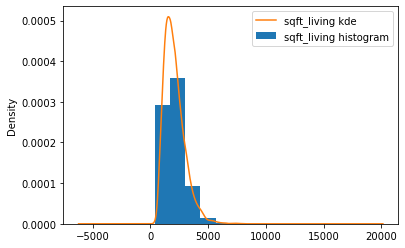

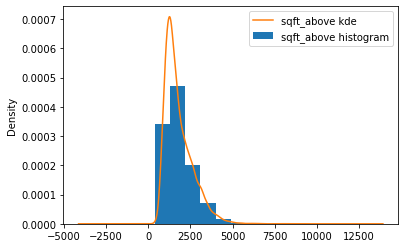

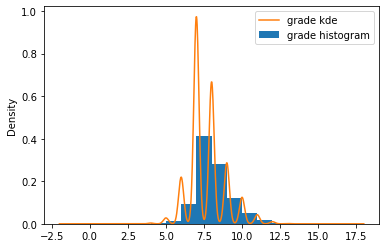

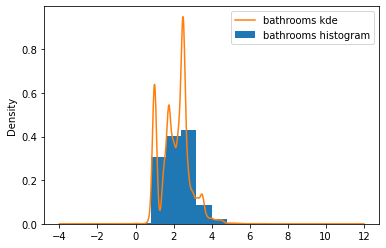

In [118]:
for column in variables:
    variables[column].plot.hist(density=True, label = column+' histogram')
    variables[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

#### 2. Checking for normality of the residuals

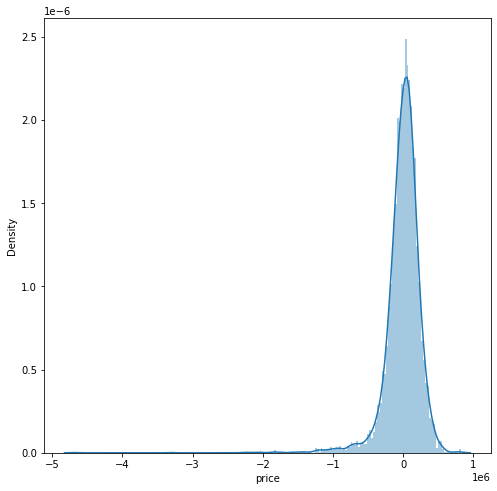

In [113]:
test_residuals = y_hat_test-y_test
fig,ax=plt.subplots(figsize=(8,8))
sns.distplot(a=test_residuals,bins='auto',ax=ax);


#### 3. Checking for homoscedasticity

In [ ]:
fig,ax = plt.subplots()
